In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
t_start = 0.0
t_end = 1.0
h = 0.01

def f(t):
    envelope = 0.25 + 0.75*np.exp(-20.0*(t - 0.5)**2)
    return envelope*np.sin(2*np.pi*3*t)

def f_prime(t):
    envelope = 0.25 + 0.75*np.exp(-20.0*(t - 0.5)**2)
    return envelope*(6*np.pi)*np.cos(2*np.pi*3*t) + np.sin(2*np.pi*3*t)*0.75*(-40)*(t-0.5)*np.exp(-20.0*(t - 0.5)**2)

t_grid = np.arange(t_start, t_end, h)
x_true_grid = f(t_grid)
x_prime_true_grid = f_prime(t_grid)

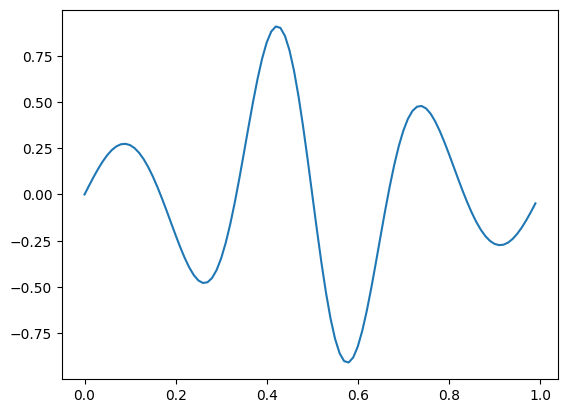

In [27]:
plt.plot(t_grid, x_true_grid)
#plt.plot(t_grid, x_prime_true_grid)

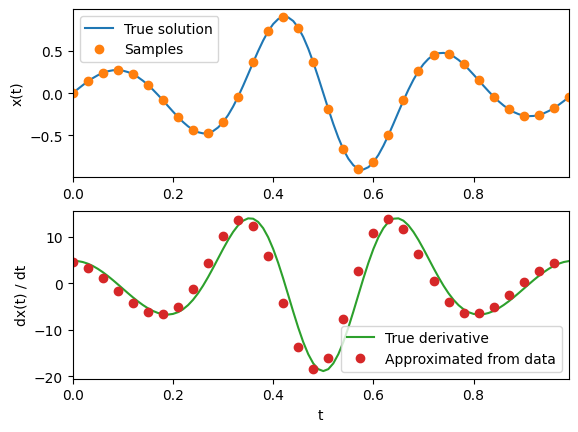

In [57]:
idx_samples = list(range(0, len(t_grid), 3))
t_samples = t_grid[idx_samples]
x_samples = x_true_grid[idx_samples]

deriv_approx_samples = (x_samples[1:] - x_samples[:-1])/(t_samples[1:] - t_samples[:-1])

fig, axs = plt.subplots(nrows=2)

ax = axs[0]
ax.set_ylabel('x(t)')
#ax.set_xlabel('t')
ax.set_xlim(left=t_grid.min(), right=t_grid.max())

ax.plot(t_grid, x_true_grid, ls='-', marker='none', color='tab:blue', label='True solution')
ax.plot(t_samples, x_samples, ls='none', marker='o', color='tab:orange', label='Samples')
ax.legend()

ax = axs[1]
ax.set_ylabel('dx(t) / dt')
ax.set_xlabel('t')
ax.set_xlim(left=t_grid.min(), right=t_grid.max())

ax.plot(t_grid, x_prime_true_grid, ls='-', marker='none', color='tab:green', label='True derivative')
ax.plot(t_samples[:-1], deriv_approx_samples, ls='none', marker='o', color='tab:red', label='Approximated from data')
ax.legend()

plt.savefig('deriv_from_samples.png')

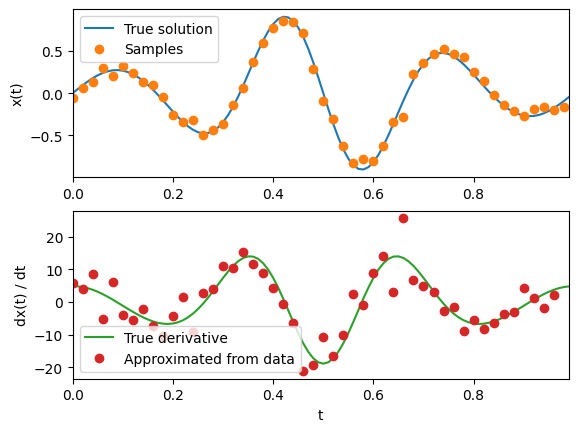

In [58]:
idx_samples = list(range(0, len(t_grid), 2))
t_samples = t_grid[idx_samples]
x_samples = x_true_grid[idx_samples]
rng_noise = np.random.RandomState(840)
x_samples = x_samples + rng_noise.normal(loc=0.0, scale=0.05, size=x_samples.shape)

deriv_approx_samples = (x_samples[1:] - x_samples[:-1])/(t_samples[1:] - t_samples[:-1])

fig, axs = plt.subplots(nrows=2)

ax = axs[0]
ax.set_ylabel('x(t)')
#ax.set_xlabel('t')
ax.set_xlim(left=t_grid.min(), right=t_grid.max())

ax.plot(t_grid, x_true_grid, ls='-', marker='none', color='tab:blue', label='True solution')
ax.plot(t_samples, x_samples, ls='none', marker='o', color='tab:orange', label='Samples')
ax.legend()

ax = axs[1]
ax.set_ylabel('dx(t) / dt')
ax.set_xlabel('t')
ax.set_xlim(left=t_grid.min(), right=t_grid.max())

ax.plot(t_grid, x_prime_true_grid, ls='-', marker='none', color='tab:green', label='True derivative')
ax.plot(t_samples[:-1], deriv_approx_samples, ls='none', marker='o', color='tab:red', label='Approximated from data')
ax.legend()

plt.savefig('deriv_from_noisy_samples.png')